<hr>
<h1 id="clustering_vehicle_dataset">Clustering on Vehicle dataset</h1>

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("cars_clus.csv")
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [3]:
## Feature Selection and Data Cleaning ##

df = df.iloc[:, 4:-2]
df.head()

,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000
1,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000
2,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000
3,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000
4,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000


In [4]:
df = df.apply(pd.to_numeric, errors="coerce")
df = df.dropna()
df = df.reset_index(drop=True)
df.tail()

,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
147,0.0,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0
148,0.0,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0
149,0.0,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0
150,0.0,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0
151,0.0,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0


## Normalization
- Before we begin normalizing, let's go over the difference between StandardScaler and MinMaxScaler
- **MinMaxScaler:** Rescales the data such that it is between a given range. (It's 0, 1 included - by default.)
- **StandardScaler:** Transforms each value to have close to zero mean and close to unit variance.

In [5]:
## Normalization ##
from sklearn.preprocessing import MinMaxScaler

df_clus = df.iloc[:, 2:]
X = df_clus.values
scaler = MinMaxScaler()
feature_matrix = scaler.fit_transform(X)
feature_matrix[:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.2716763 , 0.30625832,
        0.20233886, 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.44508671, 0.5792277 ,
        0.44112048, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.50867052, 0.62849534,
        0.53168344, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.32369942, 0.38082557,
        0.2999728 , 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.78034682, 0.56724368,
        0.45308676, 0.37788018, 0.23333333]])

In [6]:
## Clustering ##
from scipy.spatial import distance_matrix

# Creating the distance matrix:
dist_matrix = distance_matrix(feature_matrix, feature_matrix)

Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [7]:
clus = AgglomerativeClustering(n_clusters=6, linkage="complete")
clus.fit(feature_matrix)
clus.labels_

array([4, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 0, 0, 0,
       2, 4, 3, 0, 4, 4, 0, 4, 0, 0, 5, 4, 4, 2, 1, 1, 1, 0, 0, 0, 4, 0,
       4, 0, 4, 0, 0, 0, 1, 0, 1, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 4, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0,
       4, 0, 0, 2, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 5,
       4, 0, 5, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 4, 4, 0, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0],
      dtype=int64)

In [8]:
df["cluster"] = clus.labels_
df.head()

,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,cluster
0,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,4
1,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,0
2,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,0
3,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,4
4,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,0


In [9]:
# Counting each cluster
df["cluster"].value_counts()

4    68
0    68
1     9
5     3
2     3
3     1
Name: cluster, dtype: int64

In [10]:
## Looking at the descriptive properties of clusters ##

df.groupby(["cluster", "type"])["price", "engine_s", "horsepow", "mpg"].mean()

price  engine_s    horsepow        mpg
cluster type                                            
0       0.0   33.685227  3.577273  221.840909  23.359091
        1.0   25.093000  3.333333  181.708333  20.333333
1       1.0   35.904222  4.744444  228.333333  15.777778
2       0.0   66.010000  6.233333  365.666667  19.333333
3       0.0    9.235000  1.000000   55.000000  45.000000
4       0.0   22.031852  2.263934  150.901639  26.657377
        1.0   18.204143  2.585714  148.571429  22.571429
5       0.0   22.760000  2.500000  172.333333  26.333333

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

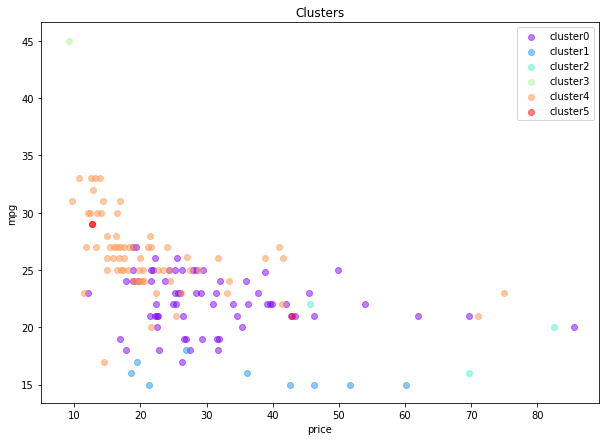

In [11]:
## Scatter-plot ## 

import matplotlib.cm as cm
n_clusters = max(clus.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(10,7))

for color, label in zip(colors, cluster_labels):
    subset = df[df["cluster"] == label]
    plt.scatter(subset.price, subset.mpg, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('price')
plt.ylabel('mpg')
plt.show()

## Properties of Clusters

- **Cluster 0:** Middle-to-high prices, relatively good performance and low mpg.
- **Cluster 1:** Wide price scale, good performance and the lowest mpgs.
- **Cluster 2:** High prices, the highest avg HP and low mpgs.
- **Cluster 3:** Might look good in a museum 
- **Cluster 4:** Low-to-middle prices, below average performance and higher mpg.
- **Cluster 5:** Low number of samples make this one irrelevant